In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima


In [2]:
from statsforecast import StatsForecast
from statsforecast.models import MSTL, AutoARIMA, SeasonalNaive
from statsforecast.utils import AirPassengers as ap

c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data=pd.read_csv(r'C:\Users\Nino\Desktop\My Files\Omdena Project\data\processed\Bago_Bago_pv_weather_merged.csv')

In [32]:
data.head()

,electricity,date,time,year,month,day,latitude,longitude,elevation,utc_offset_seconds,...,precipitation (mm),weather_code (wmo code),cloud_cover (%),wind_speed_10m (km/h),is_day (),sunshine_duration (s),shortwave_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),global_tilted_irradiance (W/m²)
0,0.0,2022-01-01,0:00:00,2022,1,1,17.328646,96.50289,13,0,...,0.0,0,20,6.5,0,0.00,0,0,0.0,0
1,0.0,2022-01-01,1:00:00,2022,1,1,17.328646,96.50289,13,0,...,0.0,0,9,5.0,1,1477.94,46,26,149.8,46
2,0.0,2022-01-01,2:00:00,2022,1,1,17.328646,96.50289,13,0,...,0.0,0,0,6.1,1,3600.00,225,76,501.6,225
3,0.0,2022-01-01,3:00:00,2022,1,1,17.328646,96.50289,13,0,...,0.0,1,26,5.9,1,3600.00,429,95,691.7,429
4,0.0,2022-01-01,4:00:00,2022,1,1,17.328646,96.50289,13,0,...,0.0,1,30,6.0,1,3600.00,570,155,661.0,570


In [4]:
data =data[['date', 'time','electricity']]
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])

In [64]:
data.head()

,date,time,electricity,datetime
0,2022-01-01,0:00:00,0.0,2022-01-01 00:00:00
1,2022-01-01,1:00:00,0.0,2022-01-01 01:00:00
2,2022-01-01,2:00:00,0.0,2022-01-01 02:00:00
3,2022-01-01,3:00:00,0.0,2022-01-01 03:00:00
4,2022-01-01,4:00:00,0.0,2022-01-01 04:00:00


In [65]:
data['date']

0       2022-01-01
1       2022-01-01
2       2022-01-01
3       2022-01-01
4       2022-01-01
           ...    
8779    2023-01-02
8780    2023-01-02
8781    2023-01-02
8782    2023-01-02
8783    2023-01-02
Name: date, Length: 8784, dtype: object

In [5]:
data_train=data[data['date'] <='2022-09-01']
data_oot=data[data['date'] >'2022-09-01']

In [34]:
data.set_index('datetime',inplace=True)

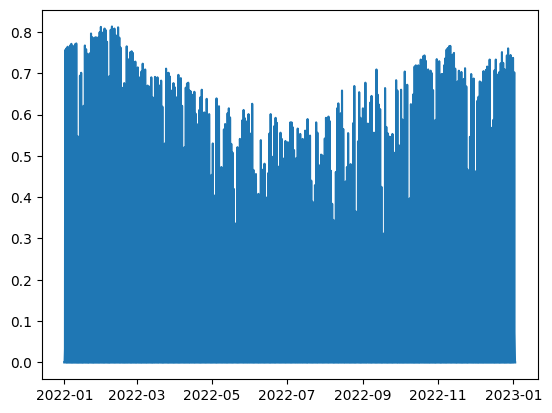

In [35]:
plt.plot(data.index,data['electricity'], label='electricity generation')

In [36]:
data.head()

,date,time,electricity
datetime,,,
2022-01-01 00:00:00,2022-01-01,0:00:00,0.0
2022-01-01 01:00:00,2022-01-01,1:00:00,0.0
2022-01-01 02:00:00,2022-01-01,2:00:00,0.0
2022-01-01 03:00:00,2022-01-01,3:00:00,0.0
2022-01-01 04:00:00,2022-01-01,4:00:00,0.0


In [7]:
from statsmodels.tsa.stattools import adatauller

# Perform Dickey-Fuller test
result = adatauller(data['electricity'].dropna())
print(f'Adata Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("The time series is not stationary.")
else:
    print("The time series is stationary.")


ADF Statistic: -10.023007160703921
p-value: 1.659863602570988e-17
The time series is stationary.


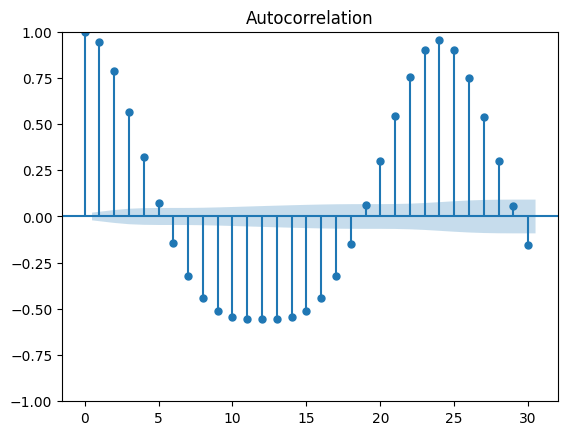

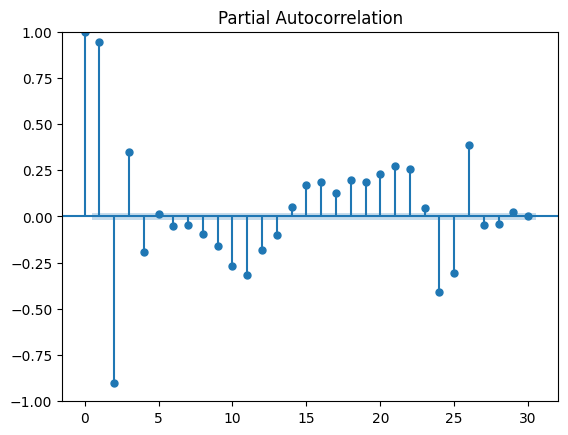

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(data['electricity'].dropna(), lags=30)
plot_pacf(data['electricity'].dropna(), lags=30)
plt.show()


In [21]:
data.shape

(8784, 3)

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(data['electricity'], 
                       order=(1, 0, 1),  # Non-seasonal ARIMA terms (p, d, q)
                       seasonal_order=(1, 0, 1, 24))  # Seasonal SARIMA terms (P, D, Q, s)
sarima_result = sarima_model.fit()

# Print summary
print(sarima_result.summary())

c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge

                                     SARIMAX Results                                      
Dep. Variable:                        electricity   No. Observations:                 8784
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood               23610.403
Date:                            Thu, 26 Sep 2024   AIC                         -47210.807
Time:                                    22:55:13   BIC                         -47175.403
Sample:                                         0   HQIC                        -47198.745
                                           - 8784                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8854      0.003    268.969      0.000       0.879       0.892
ma.L1          0.6457      0.005   

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicted values from the SARIMA model
sarima_pred = sarima_result.get_forecast(steps=len(data)).predicted_mean

# Actual values from your dataset
actual_values = data['electricity']

# Compute the evaluation metrics
mae_sarima = mean_absolute_error(actual_values, sarima_pred)
mse_sarima = mean_squared_error(actual_values, sarima_pred)
rmse_sarima = mse_sarima ** 0.5
r2_sarima = r2_score(actual_values, sarima_pred)

print(f"SARIMA Model Metrics:\nMAE: {mae_sarima}\nMSE: {mse_sarima}\nRMSE: {rmse_sarima}\nR²: {r2_sarima}")


c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SARIMA Model Metrics:
MAE: 0.09097094821939442
MSE: 0.028326751058165588
RMSE: 0.16830552889957473
R²: 0.496412650336318


In [11]:
from scipy import stats

# Apply Box-Cox transformation
data['electricity_transformed'], _ = stats.boxcox(data['electricity'] + 1)  # Add 1 to avoid log(0)

# Fit the SARIMA model on transformed data
sarima_model = SARIMAX(data['electricity_transformed'], order=(1, 0, 1), seasonal_order=(1, 1, 0, 24))
sarima_result = sarima_model.fit()


C:\Users\Nino\AppData\Local\Temp\ipykernel_9376\3862569606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['electricity_transformed'], _ = stats.boxcox(data['electricity'] + 1)  # Add 1 to avoid log(0)
c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_

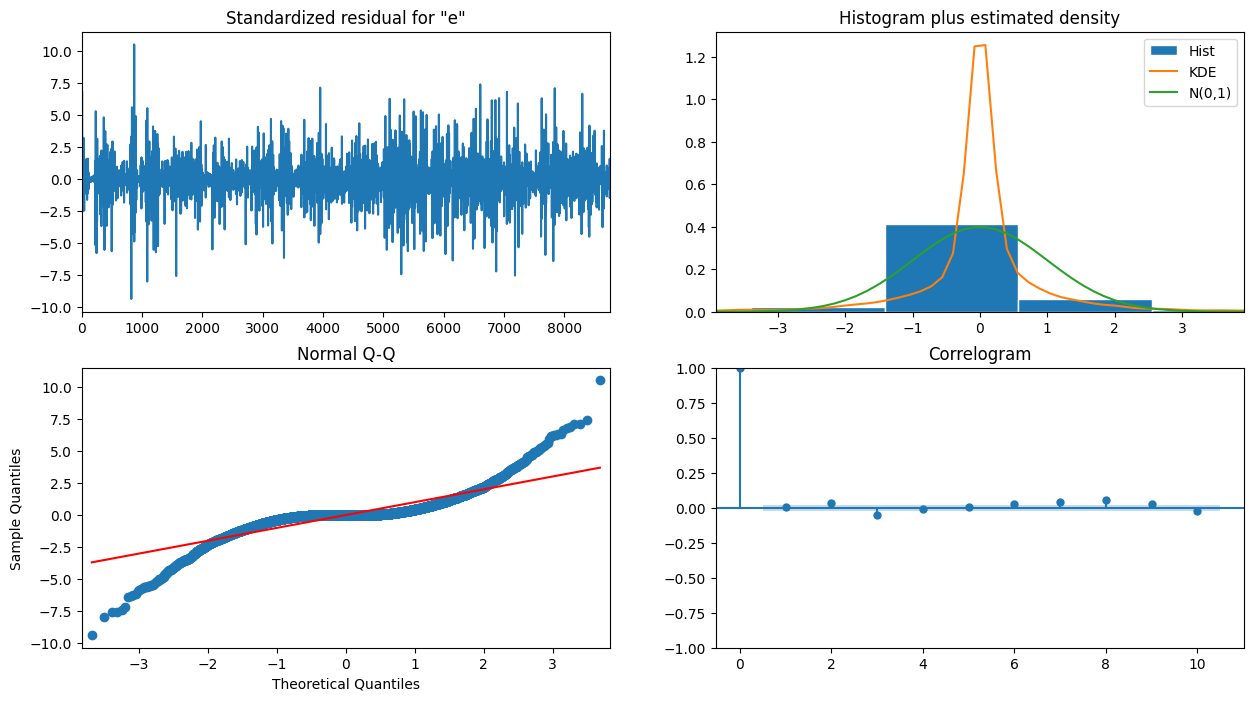

In [12]:
# Plot diagnostics to check for residuals and model fit
sarima_result.plot_diagnostics(figsize=(15, 8))
plt.show()


In [28]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.utils import AirPassengersDF

df = AirPassengersDF
df.head()
# sf = StatsForecast(
#     models = [AutoARIMA(season_length = 12)],
#     freq = 'M'
# )

# sf.fit(data)
# sf.predict(h=12, level=[95])

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


In [37]:
data.head()

,date,time,electricity
datetime,,,
2022-01-01 00:00:00,2022-01-01,0:00:00,0.0
2022-01-01 01:00:00,2022-01-01,1:00:00,0.0
2022-01-01 02:00:00,2022-01-01,2:00:00,0.0
2022-01-01 03:00:00,2022-01-01,3:00:00,0.0
2022-01-01 04:00:00,2022-01-01,4:00:00,0.0


In [70]:
data_train.head()

,date,time,electricity,datetime
0,2022-01-01,0:00:00,0.0,2022-01-01 00:00:00
1,2022-01-01,1:00:00,0.0,2022-01-01 01:00:00
2,2022-01-01,2:00:00,0.0,2022-01-01 02:00:00
3,2022-01-01,3:00:00,0.0,2022-01-01 03:00:00
4,2022-01-01,4:00:00,0.0,2022-01-01 04:00:00


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/panambY/Hourly_Energy_Consumption/master/data/PJM_Load_hourly.csv')
df.columns = ['ds', 'y']
df.insert(0, 'unique_id', 'PJM_Load_hourly')
df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values(['unique_id', 'ds']).reset_index(drop=True)
df.tail()

In [71]:
df = data_train.rename(columns={'datetime': 'ds', 'electricity': 'y'})
df.insert(0,'unique_id','load_hourly')

df['ds'] = pd.to_datetime(df['ds'])

df = df.sort_values(['unique_id', 'ds']).reset_index(drop=True)
df.tail()

,unique_id,date,time,y,ds
5845,load_hourly,2022-09-01,19:00:00,0.442,2022-09-01 19:00:00
5846,load_hourly,2022-09-01,20:00:00,0.387,2022-09-01 20:00:00
5847,load_hourly,2022-09-01,21:00:00,0.291,2022-09-01 21:00:00
5848,load_hourly,2022-09-01,22:00:00,0.174,2022-09-01 22:00:00
5849,load_hourly,2022-09-01,23:00:00,0.067,2022-09-01 23:00:00


MSTL Model

In [72]:
from statsforecast import StatsForecast
from statsforecast.models import MSTL, AutoARIMA, SeasonalNaive
from statsforecast.utils import AirPassengers as ap

In [73]:
mstl = MSTL(
    season_length=[24, 24 * 7], # seasonalities of the time series 
    trend_forecaster=AutoARIMA() # model used to forecast trend
)

In [74]:
sf = StatsForecast(
    models=[mstl], # model used to fit each time series 
    freq='H', # frequency of the data
)

In [77]:
df.drop(columns=['time','date'],inplace=True)

In [78]:
sf = sf.fit(df=df)

In [85]:
sf.

StatsForecast(models=[MSTL])

In [79]:
sf.fitted_[0, 0].model_

,data,trend,seasonal24,seasonal168,remainder
0,0.000,0.219894,-0.228743,0.000835,0.008014
1,0.000,0.220033,-0.229006,0.000879,0.008093
2,0.000,0.220173,-0.229271,0.000925,0.008173
3,0.000,0.220312,-0.229530,0.000969,0.008249
4,0.000,0.220451,-0.229781,0.001010,0.008320
...,...,...,...,...,...
5845,0.442,0.161180,0.334520,-0.003040,-0.050660
5846,0.387,0.161270,0.265398,-0.000865,-0.038803
5847,0.291,0.161359,0.165888,-0.004528,-0.031719
5848,0.174,0.161447,0.045767,-0.005668,-0.027547


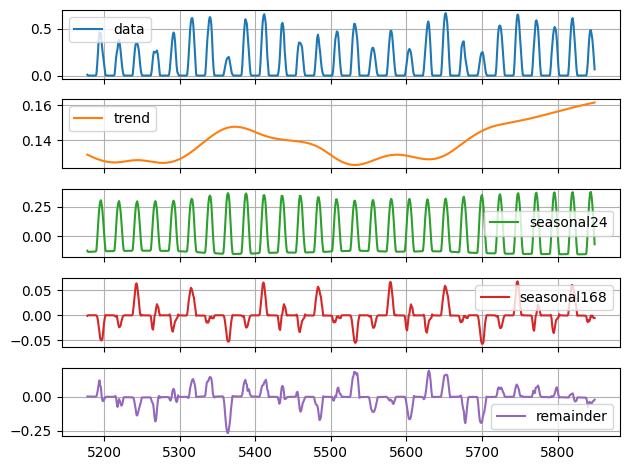

In [80]:
sf.fitted_[0, 0].model_.tail(24 * 28).plot(subplots=True, grid=True)
plt.tight_layout()
plt.show()

In [87]:
df.head()

,unique_id,y,ds
0,load_hourly,0.0,2022-01-01 00:00:00
1,load_hourly,0.0,2022-01-01 01:00:00
2,load_hourly,0.0,2022-01-01 02:00:00
3,load_hourly,0.0,2022-01-01 03:00:00
4,load_hourly,0.0,2022-01-01 04:00:00


In [81]:
forecasts = sf.predict(h=24, level=[90])
forecasts.head()

c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:438: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,MSTL,MSTL-lo-90,MSTL-hi-90
unique_id,,,,
load_hourly,2022-09-02 00:00:00,-0.003283,-0.021484,0.014917
load_hourly,2022-09-02 01:00:00,-0.004464,-0.039181,0.030253
load_hourly,2022-09-02 02:00:00,-0.002409,-0.050202,0.045385
load_hourly,2022-09-02 03:00:00,-0.001326,-0.058500,0.055849
load_hourly,2022-09-02 04:00:00,-0.000929,-0.064367,0.062509


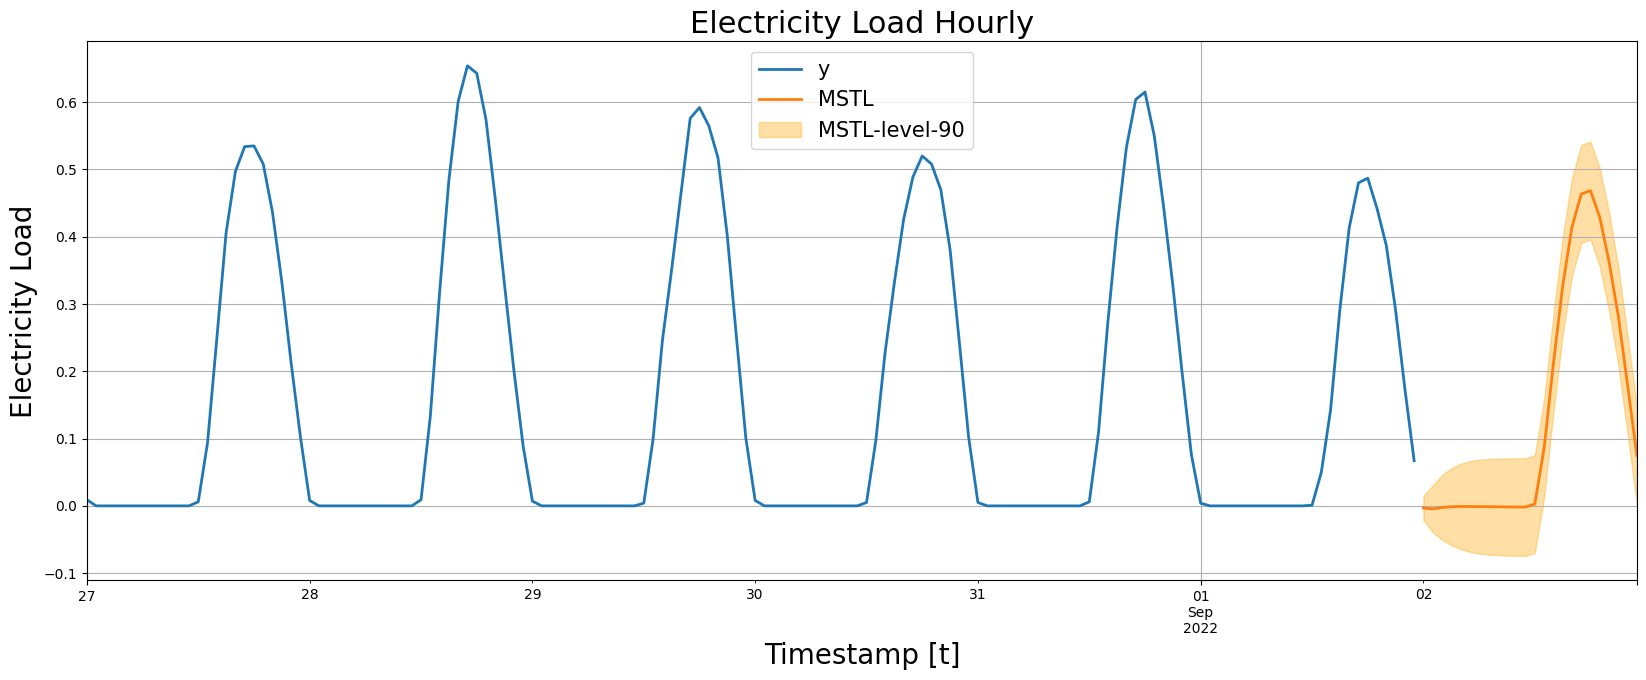

In [82]:
_, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot = pd.concat([df, forecasts]).set_index('ds').tail(24 * 7)
df_plot[['y', 'MSTL']].plot(ax=ax, linewidth=2)
ax.fill_between(df_plot.index, 
                df_plot['MSTL-lo-90'], 
                df_plot['MSTL-hi-90'],
                alpha=.35,
                color='orange',
                label='MSTL-level-90')
ax.set_title('Electricity Load Hourly', fontsize=22)
ax.set_ylabel('Electricity Load', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [83]:
from datasetsforecast.losses import (
    mae, mape, mase, rmse, smape
)

,y
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000
...,...
5845,0.442
5846,0.387
5847,0.291
5848,0.174


In [93]:
df_test = df.tail(24)
df_train = df.drop(df_test.index)


In [95]:
from time import time
init = time()
sf = sf.fit(df=df_train)
forecasts_test = sf.predict(h=len(df_test), level=[90])
end = time()
forecasts_test.head()


c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:438: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,MSTL,MSTL-lo-90,MSTL-hi-90
unique_id,,,,
load_hourly,2022-09-01 00:00:00,-0.009006,-0.027194,0.009181
load_hourly,2022-09-01 01:00:00,-0.010924,-0.045615,0.023768
load_hourly,2022-09-01 02:00:00,-0.007226,-0.055014,0.040562
load_hourly,2022-09-01 03:00:00,-0.004028,-0.061227,0.053170
load_hourly,2022-09-01 04:00:00,-0.001477,-0.064963,0.062010


In [96]:
from datasetsforecast.losses import (
    mae, mape, mase, rmse, smape
)


In [97]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = y_true.merge(y_pred, how='left', on=['unique_id', 'ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values, 
                                                 y_true[model].values, 
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T


In [99]:
evaluate_performace(df_train, df_test, forecasts_test, models=['MSTL'])


c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\datasetsforecast\losses.py:17: RuntimeWarning: divide by zero encountered in divide
  div = a / b


,mase,mae,mape,rmse,smape
MSTL,0.746878,0.021963,48.071025,0.031939,115.04626


In [57]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
import pandas as pd

df = data.rename(columns={'datetime': 'ds', 'electricity': 'y'})
df['unique_id'] = 'series_1'
df.drop(columns=['date','time'],inplace=True)

sf = StatsForecast(
    models=[AutoARIMA(season_length=24)],  # Adjust the season length as needed
    freq='H'  # Replace 'H' with your data's frequency (e.g., 'H' for hourly, 'D' for daily)
)

# Fit the model with your DataFrame
sf.fit(df)

# Predict 24 periods ahead with a confidence interval level of 95%
forecasts = sf.predict(h=24, level=[95])

# View the forecasts
print(forecasts)


                           ds     AutoARIMA  AutoARIMA-lo-95  AutoARIMA-hi-95
unique_id                                                                    
series_1  2023-01-02 13:00:00  8.873376e-06        -0.032034         0.032052
series_1  2023-01-02 14:00:00  8.872332e-06        -0.061525         0.061543
series_1  2023-01-02 15:00:00  7.756722e-06        -0.084709         0.084725
series_1  2023-01-02 16:00:00  6.257102e-06        -0.100237         0.100249
series_1  2023-01-02 17:00:00  4.765345e-06        -0.109741         0.109751
series_1  2023-01-02 18:00:00  3.464777e-06        -0.115147         0.115154
series_1  2023-01-02 19:00:00  2.417596e-06        -0.118017         0.118022
series_1  2023-01-02 20:00:00  7.577212e-02        -0.043671         0.195216
series_1  2023-01-02 21:00:00  3.099241e-01         0.189823         0.430026
series_1  2023-01-02 22:00:00  5.196895e-01         0.399306         0.640073
series_1  2023-01-02 23:00:00  6.540666e-01         0.533572    

c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:438: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\Nino\AppData\Local\Programs\Python\Python310\lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [100]:
data_train.head()

,date,time,electricity,datetime
0,2022-01-01,0:00:00,0.0,2022-01-01 00:00:00
1,2022-01-01,1:00:00,0.0,2022-01-01 01:00:00
2,2022-01-01,2:00:00,0.0,2022-01-01 02:00:00
3,2022-01-01,3:00:00,0.0,2022-01-01 03:00:00
4,2022-01-01,4:00:00,0.0,2022-01-01 04:00:00


In [101]:
data_oot.head()

,date,time,electricity,datetime
5850,2022-09-02,0:00:00,0.008,2022-09-02 00:00:00
5851,2022-09-02,1:00:00,0.000,2022-09-02 01:00:00
5852,2022-09-02,2:00:00,0.000,2022-09-02 02:00:00
5853,2022-09-02,3:00:00,0.000,2022-09-02 03:00:00
5854,2022-09-02,4:00:00,0.000,2022-09-02 04:00:00


PROPHET

In [102]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from prophet import Prophet

# Prepare the training data for Prophet
data_train = data_train.rename(columns={'datetime': 'ds', 'electricity': 'y'})

# Prepare the out-of-time data (data_oot)
data_oot = data_oot.rename(columns={'datetime': 'ds', 'electricity': 'y'})

# Initialize and fit the Prophet model on training data
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.fit(data_train[['ds', 'y']])

# Forecast for the OOT period
forecast_oot = model.predict(data_oot[['ds']])

# Join the forecasted 'yhat' values with the actual 'y' values from data_oot
forecast_oot = forecast_oot[['ds', 'yhat']].merge(data_oot[['ds', 'y']], on='ds')

# Calculate evaluation metrics
y_true = forecast_oot['y'].values
y_pred = forecast_oot['yhat'].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
r2 = r2_score(y_true, y_pred)

# Print the evaluation metrics
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R^2: {r2:.4f}')


Importing plotly failed. Interactive plots will not work.
22:35:03 - cmdstanpy - INFO - Chain [1] start processing
22:35:04 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 0.1076
MAE: 0.0838
MAPE: inf%
R^2: 0.8062


C:\Users\Nino\AppData\Local\Temp\ipykernel_9376\1162371836.py:28: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error


PROPHET next 24 hour


In [7]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from prophet import Prophet

# Prepare the training data for Prophet
data_train = data_train.rename(columns={'datetime': 'ds', 'electricity': 'y'})

data_train['y_next_24h'] = data_train['y'].shift(-24)

# Drop the rows where 'y_next_24h' is NaN (because we can't predict beyond the available data)
data_train = data_train.dropna(subset=['y_next_24h'])

# Initialize and fit the Prophet model on the original 'y' values
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.fit(data_train[['ds', 'y']])



23:15:20 - cmdstanpy - INFO - Chain [1] start processing
23:15:21 - cmdstanpy - INFO - Chain [1] done processing


,ds,ds1
0,2022-01-01 00:00:00,2022-01-02 00:00:00
1,2022-01-01 01:00:00,2022-01-02 01:00:00
2,2022-01-01 02:00:00,2022-01-02 02:00:00
3,2022-01-01 03:00:00,2022-01-02 03:00:00
4,2022-01-01 04:00:00,2022-01-02 04:00:00


In [9]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from prophet import Prophet

# Prepare the training data for Prophet
data_train = data_train.rename(columns={'datetime': 'ds', 'electricity': 'y'})

data_train['y_next_24h'] = data_train['y'].shift(-24)

# Drop the rows where 'y_next_24h' is NaN (because we can't predict beyond the available data)
data_train = data_train.dropna(subset=['y_next_24h'])

# Initialize and fit the Prophet model on the original 'y' values
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.fit(data_train[['ds', 'y']])

# Create a dataframe for future predictions (we want to predict 24 hours ahead for each row)
# The model will now predict for the time 'ds + 24 hours'
future_df = data_train[['ds']].copy()
future_df['ds'] = future_df['ds'] + pd.Timedelta(hours=24)

# Make predictions for 24 hours ahead
forecast = model.predict(future_df)

# Join the forecasted 'yhat' values with the actual 'y_next_24h' values from data_train
forecast = forecast[['ds', 'yhat']].merge(data_train[['ds', 'y_next_24h']], on='ds')

# Calculate evaluation metrics
y_true = forecast['y_next_24h'].values
y_pred = forecast['yhat'].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
r2 = r2_score(y_true, y_pred)

# Print the evaluation metrics
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R^2: {r2:.4f}')


23:29:53 - cmdstanpy - INFO - Chain [1] start processing
23:29:54 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 0.0670
MAE: 0.0489
R^2: 0.9174


C:\Users\Nino\AppData\Local\Temp\ipykernel_15776\3613018596.py:35: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error


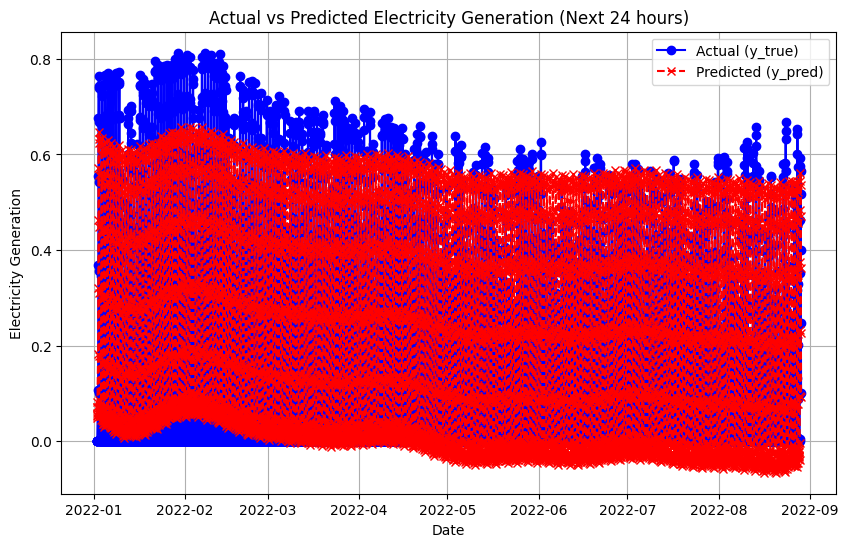

In [10]:
import matplotlib.pyplot as plt

# Plot y_true and y_pred
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], y_true, label='Actual (y_true)', color='blue', marker='o')
plt.plot(forecast['ds'], y_pred, label='Predicted (y_pred)', color='red', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Electricity Generation')
plt.title('Actual vs Predicted Electricity Generation (Next 24 hours)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
